In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from  sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import os
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import random
import matplotlib.pyplot as plt
from fastFM.mcmc import FMClassification
import sys
sys.setrecursionlimit(10000)
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier

<font face="微软雅黑" size=6 color=#000000> Load preprocessed data

In [2]:
#load data
train = pd.read_csv('new_train.csv')
#test = pd.read_csv('test.csv')
validation = pd.read_csv('validation.csv')
new_validation = pd.read_csv('new_validation.csv')

In [3]:
y_train = train['click']
y_validation = validation['click']
X_train = train.drop(['click','bidprice','payprice'],axis=1)
Validation_x = new_validation.drop(['click','bidprice','payprice'],axis=1)

<font face="微软雅黑" size=6 color=#000000> Random Forest 

In [4]:
# random forest 
# n_estimators = 100, max_depth = 3,  min_samples_split = 4, min_samples_leaf = 4, random_state = 500              0.8203
def randomforest(X_train,y_train,Validation_x, n_estimators = 100, max_depth = 3,  min_samples_split = 6 , min_samples_leaf = 4, random_state = 500 ):
    rf = RandomForestClassifier(n_estimators=n_estimators,random_state = random_state)
    rf_model = rf.fit(X_train, y_train)
    rf_pCTR = rf_model.predict_proba(Validation_x)
    rf_pCTR = pd.DataFrame(rf_pCTR)
    RF = pd.DataFrame(data = list(zip(validation["bidid"], rf_pCTR[1])),
                               columns = ["bidid", "pCTR"])
    return RF

In [6]:
RF =randomforest(X_train,y_train,Validation_x, n_estimators = 100, max_depth = 5,  min_samples_split = 6, min_samples_leaf = 6, random_state = 500)

<font face="微软雅黑" size=6 color=#000000> XGboosting 

In [ ]:
# XGboosting 
# not remove city
#n_estimators = 200, max_depth = 3, learning_rate = 0.1, random_state = 500 ----- 0.888
# n_estimators = 200, max_depth = 5, learning_rate = 0.1, random_state = 500 ----- 0.8957     169 
# n_estimators = 200, max_depth = 5, learning_rate = 0.1, random_state = 500 ----- 0.8967.    
# n_estimators = 100, max_depth = 5, learning_rate = 0.1, random_state = 500 ------0.8932

# remove city 
# n_estimators = 200, max_depth = 5, learning_rate = 0.1, random_state = 500 ----- 0.8929     170 
def XGboosting(X_train,y_train,Validation_x,n_estimators = 200, max_depth = 3, learning_rate = 0.1, random_state = 123):
    XG = XGBClassifier(n_estimators = n_estimators, max_depth = max_depth, learning_rate = learning_rate, random_state = random_state)
    XG_model = XG.fit(X_train, y_train)
    XG_pCTR = XG_model.predict_proba(Validation_x)
    XG_pCTR = pd.DataFrame(XG_pCTR)
    XG = pd.DataFrame(data = list(zip(validation["bidid"], XG_pCTR[1])),
                               columns = ["bidid", "pCTR"])
    return XG

In [18]:
# predict click 
# def XGboosting(X_train,y_train,Validation_x,n_estimators = 200, max_depth = 3, learning_rate = 0.1, random_state = 500):
#     XG = XGBClassifier(n_estimators = n_estimators, max_depth = max_depth, learning_rate = learning_rate, random_state = random_state)
#     XG_model = XG.fit(X_train, y_train)
#     XG_pClick = XG_model.predict(Validation_x)
#     XG_pClick = pd.DataFrame(XG_pClick)
#     #XG_pclick = pd.DataFrame(data = list(zip(validation["bidid"], XG_pClick[0])),
#                                #columns = ["bidid", "pClick"])
#     return XG_pClick

In [ ]:
XG =  XGboosting(X_train,y_train,Validation_x,n_estimators = 200, max_depth = 5 , learning_rate = 0.1, random_state = 500) 

<font face="微软雅黑" size=6 color=#000000> Neural Network 

In [128]:
def Neural_Network(X_train,y_train,Validation_x, learning_rate, random_state = 500):
    NN = MLPClassifier(learning_rate,random_state =500)
    NN_model = NN.fit(X_train, y_train)
    NN_pCTR = NN_model.predict_proba(Validation_x)
    NN_pCTR = pd.DataFrame(NN_pCTR)
    NN = pd.DataFrame(data = list(zip(validation["bidid"], NN_pCTR[1])),
                               columns = ["bidid", "pCTR"])
    return NN

In [132]:
#NN = Neural_Network(X_train,y_train,Validation_x, learning_rate = 'constant', random_state = 500)

<font face="微软雅黑" size=6 color=#000000>Factorization Machine Classification

In [107]:
def  FMClassification(X_train,y_train,Validation_x, n_iter=100, init_stdev=0.1, rank=8, random_state=123, copy_X=True, l2_reg_w = 0.1, l2_reg_V= 0.1):
    FM = FMClassification(n_iter = n_iter, init_stdev=init_stdev, rank = rank ,random_state =random_state, l2_reg_w = 0.1, l2_reg_V= 0.1)
    FM_model = FM.fit(X_train, y_train)
    FM_pCTR = FM_model.predict_proba(Validation_x)
    FM_pCTR = pd.DataFrame(FM_pCTR)
    FM = pd.DataFrame(data = list(zip(validation["bidid"], FM_pCTR[1])),
                               columns = ["bidid", "pCTR"])

In [110]:
FM = FMClassification(X_train,y_train,Validation_x, n_iter=100, init_stdev=0.1, rank=2, random_state=500, copy_X=True,l2_reg_w = 0.1, l2_reg_V= 0.1)

<font face="微软雅黑" size=6 color=#000000>SVM

In [121]:
def SVM(X_train,y_train,Validation_x, C = 0.1, kernel='rbf', degree = 2 , gamma = 'auto',tol = 0.01 ,max_iter =10,probability = True,cache_size=1000):
    SVM = svm.SVC(C, kernel, degree, gamma,tol,max_iter,probability = True,cache_size=1000)
    SVM_model = SVM.fit(X_train, y_train)
    SVM_pCTR = SVM_model.predict_proba(Validation_x)
    SVM_pCTR = pd.DataFrame(SVM_pCTR)
    SVM = pd.DataFrame(data = list(zip(validation["bidid"], SVM_pCTR[1])),columns = ["bidid", "pCTR"])
    return SVM

In [124]:
SVM = SVM(X_train,y_train,Validation_x, C = 0.1, kernel='rbf', degree = 2 , gamma = 'scale',tol = 0.01 ,max_iter =10,probability = True,cache_size=1000)

<font face="微软雅黑" size=6 color=#000000> Adaboost

In [7]:
def Adaboost(X_train,y_train,Validation_x, n_estimators=1000, learning_rate=0.10):
    Ada = AdaBoostClassifier(n_estimators=1000, learning_rate=0.10)
    Ada_model = Ada.fit(X_train, y_train)
    Ada_pCTR = Ada_model.predict_proba(Validation_x)
    Ada_pCTR = pd.DataFrame(Ada_pCTR)
    Ada = pd.DataFrame(data = list(zip(validation["bidid"], Ada_pCTR[1])),columns = ["bidid", "pCTR"])
    return Ada

In [8]:
Ada =  Adaboost(X_train,y_train,Validation_x, n_estimators=500, learning_rate=0.05)

In [59]:
ensemble = RF['pCTR']*a + XG['pCTR']*b

In [60]:
ensemble = pd.DataFrame(data = list(zip(validation["bidid"], ensemble)),
                          columns = ["bidid", "pCTR"])

In [61]:
ensemble.shape

(303925, 2)

In [62]:
roc_auc_ensemble = roc_auc_score(validation['click'], ensemble['pCTR'])

In [63]:
roc_auc_ensemble

0.8693909979791057

In [147]:
# Evaluate the models 
def plot_ROC_curve(dataset, prediction):
    """
    Function to plot the ROC curve with AUC.
    """

    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(dataset, prediction)
    roc_auc = roc_auc_score(dataset, prediction)

    label_title = 'ROC Curve (AUC = %0.3f)' % roc_auc

    plot_title = 'ROC'
    sns.set(color_codes=True)
    plt.tick_params(labelsize=6)
    plt.plot(fpr, tpr, label=label_title)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.title(plot_title, fontsize=13)
    plt.legend(loc="lower right", fontsize=13)


In [23]:
roc_auc_RF = roc_auc_score(validation['click'], RF['pCTR'])

In [24]:
roc_auc_RF

0.820345437216552

In [153]:
#XG = pd.read_csv('Xgboosting_pCTR.csv')

In [154]:
roc_auc_XG = roc_auc_score(validation['click'], XG['pCTR'])

In [155]:
roc_auc_XG

0.8967149930093611

In [78]:
roc_auc_NN = roc_auc_score(validation['click'], NN['pCTR'])

In [79]:
roc_auc_NN

0.5038428710266647

In [143]:
roc_auc_Ada = roc_auc_score(validation['click'], Ada['pCTR'])

In [144]:
roc_auc_Ada

0.8494824687672192

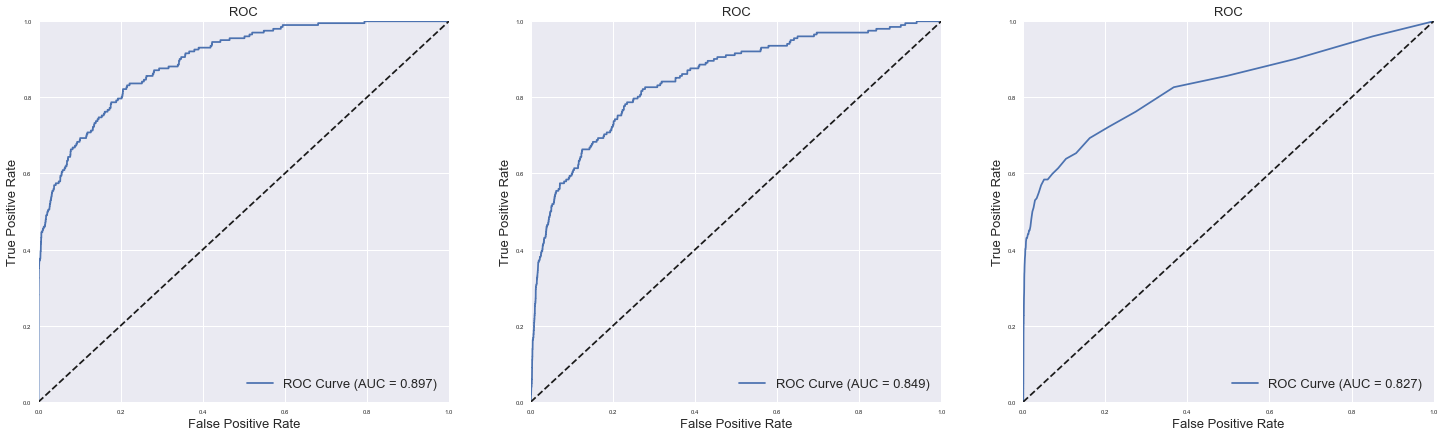

In [156]:
plt.figure(figsize = (25,7))


sns.set(color_codes=True)
plt.subplot(1,3,1)
plot_ROC_curve(validation['click'], XG['pCTR'])



plt.subplot(1,3,2)
plot_ROC_curve(validation['click'], Ada['pCTR'])


plt.subplot(1,3,3)
plot_ROC_curve(validation['click'], RF['pCTR'])
plt.savefig(os.path.join('figures', 'ROC.png'), format='png', dpi=300)

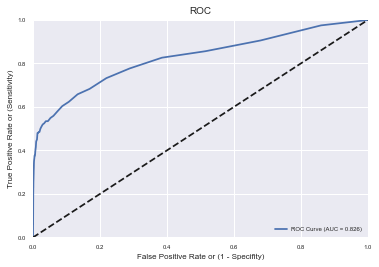

In [66]:
plot_ROC_curve(validation['click'], RF['pCTR'])
plt.savefig(os.path.join('figures', 'ROC_XG_0.8256.png'), format='png', dpi=300)

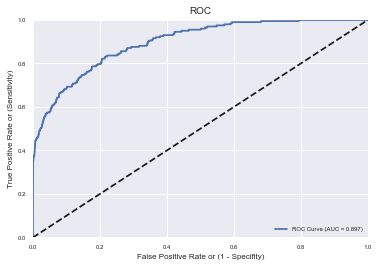

In [63]:
plot_ROC_curve(validation['click'], XG['pCTR'])
plt.savefig(os.path.join('figures', 'ROC_XG_0.8967.png'), format='png', dpi=300)

In [67]:
RF.to_csv("RandomForest_validation.csv")

In [32]:
XG.to_csv("XG_validation.csv")

In [9]:
Ada.to_csv("Ada_validation.csv")

In [2]:
Ada = pd.read_csv('Ada_validation.csv')

In [4]:
len(Ada)

303925